In [ ]:
import requests

res = requests.get('http://api.open-notify.org/iss-now.json')

In [2]:
res.json()

{'iss_position': {'latitude': '37.0592', 'longitude': '62.4277'},
 'timestamp': 1690029059,
 'message': 'success'}

In [3]:
import time

data = []

for i in range(110):
    print(i)
    res = requests.get('http://api.open-notify.org/iss-now.json')
    json_data = res.json()
    data.append(json_data)
    time.sleep(10)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


In [4]:
headers = ['timestamp', 'latitude', 'longitude']

body = []
for record in data:
    row = []
    row.append(record['timestamp'])
    row.append(record['iss_position']['latitude'])
    row.append(record['iss_position']['longitude'])
    body.append(row)

In [5]:
body

[[1690029167, '41.2424', '69.2132'],
 [1690029178, '41.6238', '69.9204'],
 [1690029188, '42.0004', '70.6365'],
 [1690029199, '42.3719', '71.3616'],
 [1690029209, '42.7208', '72.0606'],
 [1690029219, '43.0819', '72.8035'],
 [1690029230, '43.4376', '73.5557'],
 [1690029240, '43.7877', '74.3172'],
 [1690029251, '44.1321', '75.0882'],
 [1690029261, '44.4707', '75.8688'],
 [1690029272, '44.8032', '76.6588'],
 [1690029282, '45.1295', '77.4584'],
 [1690029292, '45.4345', '78.2288'],
 [1690029303, '45.7484', '79.0471'],
 [1690029313, '46.0558', '79.8752'],
 [1690029324, '46.3565', '80.7129'],
 [1690029334, '46.6503', '81.5604'],
 [1690029345, '46.9371', '82.4174'],
 [1690029355, '47.2168', '83.2840'],
 [1690029366, '47.4891', '84.1602'],
 [1690029376, '47.7416', '85.0034'],
 [1690029386, '47.9993', '85.8980'],
 [1690029397, '48.2492', '86.8019'],
 [1690029407, '48.4913', '87.7149'],
 [1690029418, '48.7254', '88.6371'],
 [1690029428, '48.9514', '89.5681'],
 [1690029439, '49.1690', '90.5077'],
 

In [18]:
import csv

with open('iss.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(body)

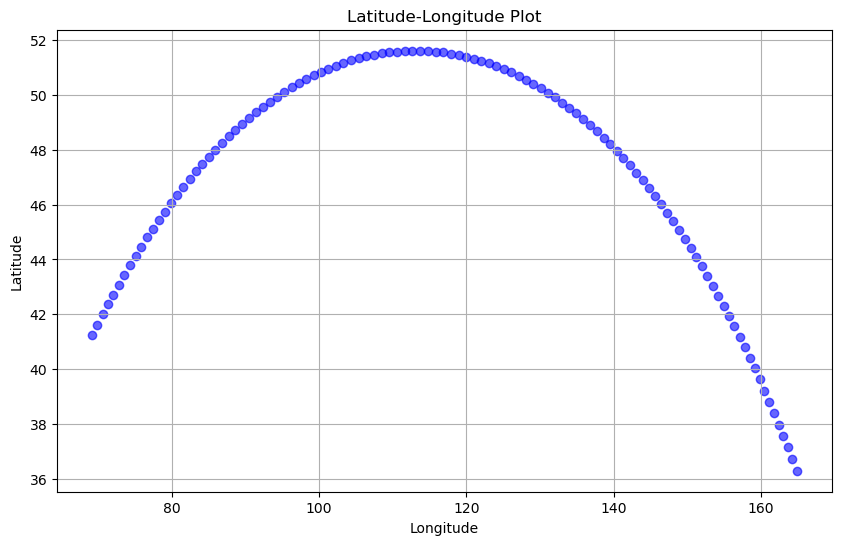

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('iss.csv')

latitude = data['latitude']
longitude = data['longitude']

plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='blue', alpha=0.6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude-Longitude Plot')

plt.grid(True)
plt.show()